In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing basic libraries for visualization and data analyzing

In [3]:
#import data sets
df_train = pd.read_csv('train.csv', engine='python')
df_test = pd.read_csv('test.csv', engine = 'python')

In [6]:
# observe the data to see if there are any missing values and data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [8]:
# 빈갑들이 0 이 돼는 이유는 총 건수의 갑때문에
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [16]:
#Drop ID column in train and test
train_ID = df_train['custid']
test_id = df_test['custid']

df_train.drop('custid', axis=1, inplace=True)
df_test.drop('custid', axis=1, inplace=True)

In [17]:
# 한글로 하면 계속 에러날거같으니까
# 그냥 죄다 영어로 바꾸자
# 나중에 어렵게하고싶지 않아.

df_train=df_train.rename(columns={'총구매액':'tot_price', '구매건수':'count', 
                         '평균구매가격':'avg_price', '평균할부개월수':'avg_install',
                         '구매브랜드종류':'brand_category', '내점일수':'visited', 
                         '수입상품_구매비율':'income_rate', '주말방문비율':'week_visited',
                         '가을_구매건수':'fall_count', '겨울_구매건수':'wint_count',
                         '봄_구매건수':'spring_count', '여름_구매건수':'summer_count',
                         '아침_구매건수':'morning_count', '저녁_구매건수':'night_count',
                         '점심_구매건수':'after_count', '주구매코너':'major'})
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5000 non-null   int64  
 1   tot_price       5000 non-null   int64  
 2   count           5000 non-null   int64  
 3   avg_price       5000 non-null   int64  
 4   avg_install     5000 non-null   float64
 5   brand_category  5000 non-null   int64  
 6   visited         5000 non-null   int64  
 7   income_rate     5000 non-null   float64
 8   week_visited    5000 non-null   float64
 9   fall_count      5000 non-null   float64
 10  wint_count      5000 non-null   float64
 11  spring_count    5000 non-null   float64
 12  summer_count    5000 non-null   float64
 13  morning_count   5000 non-null   float64
 14  night_count     5000 non-null   float64
 15  after_count     5000 non-null   float64
 16  major           5000 non-null   object 
dtypes: float64(10), int64(6), object(

In [18]:
# 수치형으로 입력할경우 순위가 생기기떄문에 안됨
# 그래서 one-hot 인코딩으로 
df_train['major'].value_counts()

일반식품        1306
화장품         1206
유니캐주얼        410
유아동복         383
스포츠          301
영캐주얼         246
캐릭터캐주얼       188
수입명품         136
섬유            96
트래디셔널캐주얼      91
니트단품          91
정장셔츠          90
엘레강스캐주얼       78
피혁A           75
장신구           68
피혁B           56
디자이너부띠끄       51
문화완구          38
조리욕실          28
가전            18
기타바이어         12
도자기크리스탈       11
침구수예           8
가구             7
타운모피           6
Name: major, dtype: int64

In [19]:
# major를 숫자화 한다
df_train['major'] = df_train['major'].astype('category')
df_train['major'] = df_train['major'].cat.codes
df_train['major'].value_counts()

14    1306
24    1206
12     410
13     383
9      301
11     246
19     188
8      136
7       96
21      91
3       91
16      90
10      78
22      75
15      68
23      56
5       51
6       38
17      28
1       18
2       12
4       11
18       8
0        7
20       6
Name: major, dtype: int64

In [20]:
## get the most important variables. 
corr = df_train.corr()**2
corr.gender.sort_values(ascending=False)

gender            1.000000
morning_count     0.016327
summer_count      0.010384
tot_price         0.009828
after_count       0.009455
count             0.008840
fall_count        0.007850
visited           0.007099
brand_category    0.007054
spring_count      0.005794
avg_price         0.005210
wint_count        0.004259
major             0.001542
night_count       0.000467
income_rate       0.000453
week_visited      0.000418
avg_install       0.000403
Name: gender, dtype: float64

In [21]:
#feature engineering
# introduce new feature
df_train['tot_exported_goods'] = np.where((df_train['income_rate']!=0),
                                (df_train['income_rate']* df_train['tot_price']) / 100, 0)

In [23]:
# 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경
def createFeatures(df_p):
    df_p['morning_price'] = np.round(df_p['tot_price']*(df_p['morning_count'] /df_p['count'] ), 3)
    df_p['after_price'] = np.round(df_p['tot_price']*(df_p['after_count'] /df_p['count'] ), 3)
    df_p['night_price'] = np.round(df_p['tot_price']*(df_p['night_count'] /df_p['count'] ), 3)  
    df_p['spring_price']   = np.round(df_p['tot_price']*(df_p['spring_count'] /df_p['count'] ), 3) 
    df_p['summer_price'] = np.round(df_p['tot_price']*(df_p['summer_count'] /df_p['count'] ), 3) 
    df_p['fall_price'] = np.round(df_p['tot_price']*(df_p['fall_count'] /df_p['count'] ), 3)  
    df_p['wint_price'] = np.round(df_p['tot_price']*(df_p['wint_count'] /df_p['count'] ), 3)  
    df_p['visited_price'] = np.round(df_p['count'] /df_p['visited'], 3)

def dropFeatures(df_p):
    drop_cols = ['morning_count', 'after_count', 'night_count',
         'spring_count', 'summer_count', 'fall_count', 'wint_count'] 
    
    return df_p.drop(drop_cols, axis=1)

createFeatures(df_train)
dataPP = dropFeatures(df_train) 
dataPP[(dataPP['major']==2)].head()

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
39,0,454800,5,90960,3.0,4,4,20.0,25.0,2,90960.00,0.000,90960.000,363840.000,454800.000,0.000,0.000,0.000,1.250
478,0,4712934,19,248049,2.3,10,12,10.5,33.3,2,494858.07,992196.632,3224639.053,496098.316,744147.474,992196.632,1736344.105,1240245.789,1.583
1126,1,1497200,12,124767,3.8,8,8,25.0,62.5,2,374300.00,124766.667,499066.667,873366.667,249533.333,499066.667,748600.000,0.000,1.500
1265,0,951000,12,79250,1.7,10,3,0.0,33.3,2,0.00,554750.000,396250.000,0.000,158500.000,0.000,792500.000,0.000,4.000
1612,0,253000,8,31625,1.0,6,7,12.5,14.3,2,31625.00,63250.000,189750.000,0.000,94875.000,158125.000,0.000,0.000,1.143


In [24]:
## get the most important variables. 
corr = dataPP.corr()**2
corr.gender.sort_values(ascending=False)

gender                1.000000
morning_price         0.014550
summer_price          0.010433
tot_price             0.009828
fall_price            0.009134
after_price           0.008952
count                 0.008840
visited               0.007099
brand_category        0.007054
spring_price          0.006574
wint_price            0.005555
avg_price             0.005210
tot_exported_goods    0.004293
visited_price         0.002412
major                 0.001542
income_rate           0.000453
week_visited          0.000418
avg_install           0.000403
night_price           0.000226
Name: gender, dtype: float64

Class 0: 3479
Class 1: 1521
Proportion: 2.29 : 1


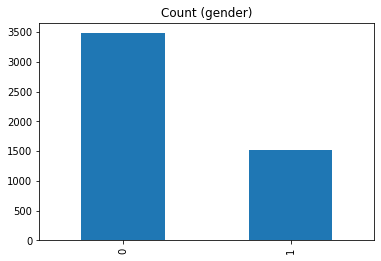

In [25]:
gender_count = df_train.gender.value_counts()
print('Class 0:', gender_count[0])
print('Class 1:', gender_count[1])
print('Proportion:', round(gender_count[0] / gender_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (gender)');

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Remove 'id' and 'target' columns
labels = dataPP.columns[2:]

X = dataPP[labels]
y = dataPP['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.50%


In [30]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.50%


Confusion matrix:
 [[667  27]
 [288  18]]


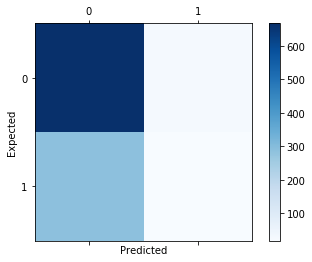

In [31]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [33]:
count_class_0, count_class_1 = dataPP.gender.value_counts()

# Divide by class
df_class_0 = df_train[df_train['gender'] == 0]
df_class_1 = df_train[df_train['gender'] == 1]

Random under-sampling:
1    1521
0    1521
Name: gender, dtype: int64


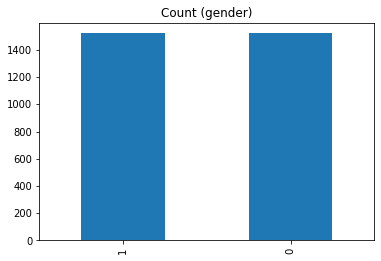

In [35]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.gender.value_counts())

df_test_under.gender.value_counts().plot(kind='bar', title='Count (gender)');

Random over-sampling:
1    3479
0    3479
Name: gender, dtype: int64


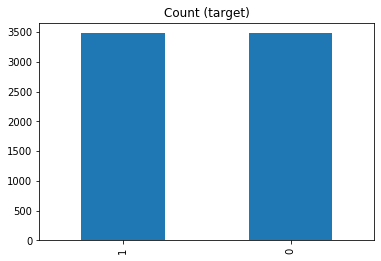

In [36]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.gender.value_counts())

df_test_over.gender.value_counts().plot(kind='bar', title='Count (target)');

In [37]:
df_test_over

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,fall_count,...,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
0,0,680100,15,45340,1.7,9,10,26.7,100.0,0.0,...,24,181586.700,0.000,4.080600e+05,272040.000,272040.000,0.000,0.000,408060.000,1.500
1,0,353450,9,39272,1.2,6,8,11.1,37.5,0.0,...,11,39232.950,117816.667,2.356333e+05,0.000,157088.889,0.000,0.000,196361.111,1.125
2,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,...,15,317598.400,1575388.889,2.363083e+06,1732927.778,1890466.667,0.000,1102772.222,2678161.111,2.250
3,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,...,24,771852.000,0.000,7.014286e+05,1262571.429,1052142.857,0.000,350714.286,561142.857,2.000
4,0,885000,5,177000,6.0,5,2,0.0,100.0,0.0,...,22,0.000,0.000,0.000000e+00,885000.000,885000.000,0.000,0.000,0.000,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1,21952026,60,365867,2.5,34,24,41.7,37.5,17.0,...,8,9153994.842,9878411.700,1.170775e+07,365867.100,4756272.300,3658671.000,6219740.700,7317342.000,2.500
4817,1,3620500,8,452562,2.0,6,5,25.0,60.0,1.0,...,5,905125.000,452562.500,3.167938e+06,0.000,0.000,0.000,452562.500,3167937.500,1.600
4380,1,2261691,66,34268,1.7,30,44,9.1,38.6,25.0,...,14,205813.881,68536.091,1.233650e+06,959505.273,171340.227,753897.000,856701.136,479752.636,1.500
4266,1,1095600,14,78257,2.9,9,10,0.0,20.0,2.0,...,15,0.000,234771.429,8.608286e+05,0.000,626057.143,313028.571,156514.286,0.000,1.400


In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Remove 'id' and 'target' columns
labels = dataPP.columns[2:]

X = df_test_over[labels]
y = df_test_over['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.87%


In [41]:
from imblearn.combine import *
from sklearn.metrics import roc_curve, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       693
           1       0.65      0.65      0.65       699

    accuracy                           0.65      1392
   macro avg       0.65      0.65      0.65      1392
weighted avg       0.65      0.65      0.65      1392



In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

TypeError: __init__() got an unexpected keyword argument 'ratio'